In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/kristikorsberg/devel/ML/ML_Nepal'

In [3]:
ls Data/

caste.csv                  normalized_ce.csv
caste_percent.csv          poverty1.csv
communicabledisease1.csv   poverty1T.csv
communicabledisease1T.csv  poverty2.csv
communicabledisease2.csv   poverty2T.csv
communicabledisease2T.csv  sexratio.csv
hdi2011.csv                vaccinations.csv
master.csv                 vaccinationsT.csv
mentalhealth.csv           watersanitaion.csv
mentalhealthT.csv          watersanitationT.csv
nepaldistricts.zip


In [4]:
caste = pd.read_csv('Data/caste.csv')
caste.head()

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Caste/Ethnicity,Gender,In number
0,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Chhetree,Male,66837
1,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Chhetree,Female,76097
2,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Brahman - Hill,Male,12289
3,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Brahman - Hill,Female,13983
4,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Kami,Male,11340


In [5]:
#caste = caste.replace(['Darchula', 'Kavrepalanchok'], ['Darchaula','Kavre'])

### aggregate caste/ethnicity to 13 more generalized groups
*  Classification of these categories is based more on a cultural basis as caste/ethnic groups included in each broader category have more or less common cultural values 

* file:///Users/kristikorsberg/Downloads/Social%20Demography%20of%20Nepal%202011%20-%20YBG.pdf

In [6]:
sg = {'Brahman - Hill':'Hill Brahman', 'Chhetree':'Hill Chhetree', 'Thakuri':'Hill Chhetree', \
      'Dashnami/Sanyasi':'Hill Chhetree', 'Brahman - Tarai':'Madhesi Brahman/Chhetree', \
     'Kayastha':'Madhesi Brahman/Chhetree', 'Rajput':'Madhesi Brahman/Chhetree', 'Amat':'Madhesi Other - OC A', \
     'Badhaee':'Madhesi Other - OC A', 'Baraee':'Madhesi Other - OC A', 'Dev':'Madhesi Other - OC A', \
     'Gaderi/Bhedhar':'Madhesi Other - OC A', 'Hajam/Thakur':'Madhesi Other - OC A', \
     'Haluwai':'Madhesi Other - OC A', 'Kalar':'Madhesi Other - OC A', 'Kalwar':'Madhesi Other - OC A', \
     'Kamar':'Madhesi Other - OC A', 'Kathbaniyan':'Madhesi Other - OC A', 'Koiri/Kushwaha':'Madhesi Other - OC A', \
     'Kurmi':'Madhesi Other - OC A', 'Lohar':'Madhesi Other - OC A', 'Rajbhar':'Madhesi Other - OC A', \
     'Rajdhob':'Madhesi Other - OC A', 'Sonar':'Madhesi Other - OC A', 'Sudhi':'Madhesi Other - OC A', 'Kanu':'Madhesi Other - OC A', \
     'Teli':'Madhesi Other - OC A', 'Yadav':'Madhesi Other - OC A', 'Bin':'Madhesi Other - OC B', \
     'Dhandi':'Madhesi Other - OC B', 'Dhankar/Kharikar':'Madhesi Other - OC B', 'Dhunia':'Madhesi Other - OC B', \
     'Kahar':'Madhesi Other - OC B', 'Kewat':'Madhesi Other - OC B', 'Kori':'Madhesi Other - OC B', \
     'Kumhar':'Madhesi Other - OC B', 'Lodh':'Madhesi Other - OC B', 'Mali':'Madhesi Other - OC B', \
     'Mallaha':'Madhesi Other - OC B', 'Natuwa':'Madhesi Other - OC B', 'Nuniya':'Madhesi Other - OC B', \
     'Nurang':'Madhesi Other - OC B', 'Sarbaria':'Madhesi Other - OC B', 'Badi': 'Hill Dalit', \
     'Damai/Dholi':'Hill Dalit', 'Gaine':'Hill Dalit', 'Kami':'Hill Dalit', 'Sarki':'Hill Dalit', \
     'Bantar/Sardar':'Madhesi Dalit', 'Chamar/Harijan/Ram':'Madhesi Dalit', 'Chidimar':'Madhesi Dalit', \
     'Dhobi':'Madhesi Dalit', 'Dom':'Madhesi Dalit', 'Dusadh/Pasawan/Pasi':'Madhesi Dalit', \
     'Halkhor':'Madhesi Dalit', 'Khatwe':'Madhesi Dalit', 'Musahar':'Madhesi Dalit', 'Tatma/Tatwa':'Madhesi Dalit', \
     'Newar':'Newar', 'Sherpa':'Mtn/Hill Janajati A', 'Yakkha':'Mtn/Hill Janajati A', 'Jirel':'Mtn/Hill Janajati A', \
     'Kulung':'Mtn/Hill Janajati A', 'Yamphu':'Mtn/Hill Janajati A', 'Mewahang':'Mtn/Hill Janajati A', \
     'Gharti/Bhujel':'Mtn/Hill Janajati A', 'Khaling':'Mtn/Hill Janajati A', 'Darai':'Mtn/Hill Janajati A', \
     'Magar':'Mtn/Hill Janajati A', 'Chhantyal/Chhantel':'Mtn/Hill Janajati A', 'Aathpariya':'Mtn/Hill Janajati A', \
     'Bahing':'Mtn/Hill Janajati A', 'Rai':'Mtn/Hill Janajati A', 'Thulung':'Mtn/Hill Janajati A', \
     'Gurung':'Mtn/Hill Janajati A', 'Limbu':'Mtn/Hill Janajati A', 'Lepcha':'Mtn/Hill Janajati A', \
     'Sampang':'Mtn/Hill Janajati A', 'Dura':'Mtn/Hill Janajati A', 'Chamling':'Mtn/Hill Janajati A', \
     'Bantaba':'Mtn/Hill Janajati A', 'Loharung':'Mtn/Hill Janajati A', 'Thakali':'Mtn/Hill Janajati A', \
     'Bhote':'Mtn/Hill Janajati B', 'Bote':'Mtn/Hill Janajati B', 'Brahmu/Baramo':'Mtn/Hill Janajati B', \
     'Byasi/Sauka':'Mtn/Hill Janajati B', 'Chepang/Praja':'Mtn/Hill Janajati B', 'Danuwar':'Mtn/Hill Janajati B', \
     'Dolpo':'Mtn/Hill Janajati B', 'Ghale':'Mtn/Hill Janajati B', 'Hayu':'Mtn/Hill Janajati B', 'Hyolmo':'Mtn/Hill Janajati B', \
     'Kumal':'Mtn/Hill Janajati B', 'Kusunda':'Mtn/Hill Janajati B', 'Lhomi':'Mtn/Hill Janajati B', \
     'Lhopa':'Mtn/Hill Janajati B', 'Majhi':'Mtn/Hill Janajati B', 'Nachhiring':'Mtn/Hill Janajati B', \
     'Pahari':'Mtn/Hill Janajati B', 'Raji':'Mtn/Hill Janajati B', 'Raute':'Mtn/Hill Janajati B', \
     'Sunuwar':'Mtn/Hill Janajati B', 'Tamang':'Mtn/Hill Janajati B', 'Thami':'Mtn/Hill Janajati B', \
     'Topkegola':'Mtn/Hill Janajati B', 'Walung':'Mtn/Hill Janajati B', 'Dhanuk':'Tarai Janajati', \
     'Dhimal':'Tarai Janajati', 'Gangai':'Tarai Janajati', 'Jhangad/Dhagar':'Tarai Janajati', 'Kisan':'Tarai Janajati', \
     'Koche':'Tarai Janajati', 'Meche':'Tarai Janajati', 'Munda':'Tarai Janajati', 'Pattharkatta/Kushwadiya':'Tarai Janajati', \
     'Rajbansi':'Tarai Janajati', 'Satar/Santhal':'Tarai Janajati', 'Tajpuriya':'Tarai Janajati', 'Tharu':'Tarai Janajati', \
     'Musalman':'Musalman', 'Marwadi':'Other (MPB)', 'Punjabi/Shikh':'Other (MPB)', 'Bangali':'Other (MPB)', \
     'Dalit Others':'Other undefined', 'Janajati Others':'Other undefined', 'Undefined Others':'Other undefined', \
     'Terai Others':'Other undefined', 'Others':'Other undefined', 'Foreigner':'Foreigner'}

In [7]:
caste['social_groups'] = caste['Caste/Ethnicity'].map(sg)

In [8]:
caste.isnull().sum()

District               0
Zone                   0
Ecological Belt        0
Development Region     0
Year (BS)              0
Year (AD)              0
Caste/Ethnicity        0
Gender                 0
In number              0
social_groups         54
dtype: int64

In [9]:
caste[caste.isnull().any(axis=1)].head(2)

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Caste/Ethnicity,Gender,In number,social_groups
580,Banke,Bheri,Terai,Mid-Western,2068/69,2011/12,Khawas,Male,6,NaN
581,Banke,Bheri,Terai,Mid-Western,2068/69,2011/12,Khawas,Female,6,NaN


In [10]:
#sorted(caste['Caste/Ethnicity'].unique())

In [11]:
caste_two = pd.DataFrame()
caste_two['district'] = caste['District']
caste_two['unique'] = caste['social_groups']+'_'+caste['Gender']
caste_two['number'] = caste['In number']

In [12]:
caste_two = caste_two.dropna()

In [13]:
caste_three = pd.DataFrame()
caste_three['district'] = caste['District']
caste_three['unique'] = caste['social_groups']
caste_three['number'] = caste['In number']

In [14]:
caste_three = caste_three.dropna()

In [15]:
caste_three.head()

,district,unique,number
0,Achham,Hill Chhetree,66837
1,Achham,Hill Chhetree,76097
2,Achham,Hill Brahman,12289
3,Achham,Hill Brahman,13983
4,Achham,Hill Dalit,11340


In [16]:
grouped2 = pd.DataFrame(caste_three['number'].groupby([caste_three['district'], caste_three['unique']]).sum())
grouped2 = grouped2.reset_index()

In [17]:
grouped2.head()

,district,unique,number
0,Achham,Hill Brahman,26272
1,Achham,Hill Chhetree,149787
2,Achham,Hill Dalit,34800
3,Achham,Madhesi Brahman/Chhetree,26
4,Achham,Madhesi Other - OC A,1267


In [18]:
len(caste_two)

8502

In [19]:
grouped = pd.DataFrame(caste_two['number'].groupby([caste_two['district'], caste_two['unique']]).sum())
grouped = grouped.reset_index()

In [20]:
grouped.head(2)

,district,unique,number
0,Achham,Hill Brahman_Female,13983
1,Achham,Hill Brahman_Male,12289


In [21]:
grouped = grouped.pivot(index='district', columns='unique', values='number')
grouped = grouped.reset_index()
grouped = grouped.fillna(0)

In [22]:
grouped2 = grouped2.pivot(index='district', columns='unique', values='number')
grouped2 = grouped2.reset_index()
grouped2 = grouped2.fillna(0)

In [23]:
grouped.head(2)

unique,district,Foreigner_Female,Foreigner_Male,Hill Brahman_Female,Hill Brahman_Male,Hill Chhetree_Female,Hill Chhetree_Male,Hill Dalit_Female,Hill Dalit_Male,Madhesi Brahman/Chhetree_Female,...,Musalman_Female,Musalman_Male,Newar_Female,Newar_Male,Other (MPB)_Female,Other (MPB)_Male,Other undefined_Female,Other undefined_Male,Tarai Janajati_Female,Tarai Janajati_Male
0,Achham,0.0,0.0,13983.0,12289.0,79688.0,70099.0,18614.0,16186.0,8.0,...,103.0,154.0,58.0,69.0,233.0,216.0,22847.0,18926.0,53.0,205.0
1,Arghakhanchi,0.0,0.0,36806.0,27951.0,21721.0,16471.0,23320.0,17989.0,179.0,...,954.0,819.0,3167.0,2361.0,0.0,0.0,126.0,99.0,60.0,174.0


In [24]:
grouped2.head(2)

unique,district,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,Mtn/Hill Janajati B,Musalman,Newar,Other (MPB),Other undefined,Tarai Janajati
0,Achham,0.0,26272.0,149787.0,34800.0,26.0,0.0,1267.0,0.0,1782.0,679.0,257.0,127.0,449.0,41773.0,258.0
1,Arghakhanchi,0.0,64757.0,38192.0,41309.0,317.0,13.0,209.0,0.0,38212.0,6863.0,1773.0,5528.0,0.0,225.0,234.0


In [25]:
hdi = pd.read_csv('Data/hdi2011.csv')
hdi.head()

,District,Zone,Geographical Region,Development Region,HDI
0,Achham,Seti,Hill,Far-Western,0.378
1,Arghakhanchi,Lumbini,Hill,Western,0.482
2,Banke,Bheri,Terai,Mid-Western,0.475
3,Baglung,Dhawalagiri,Hill,Western,0.478
4,Baitadi,Mahakali,Hill,Far-Western,0.416


In [26]:
hdi.columns

Index([u'District ', u'Zone', u'Geographical Region', u'Development Region',
       u'HDI '],
      dtype='object')

In [27]:
hdi_caste = pd.merge(hdi, grouped, left_on='District ', right_on='district')

In [28]:
hdi_caste2 = pd.merge(hdi, grouped2, left_on='District ', right_on='district')

In [29]:
hdi_caste = hdi_caste.drop('district',axis=1)
hdi_caste2 = hdi_caste2.drop('district',axis=1)

In [30]:
hdi_caste.head()

,District,Zone,Geographical Region,Development Region,HDI,Foreigner_Female,Foreigner_Male,Hill Brahman_Female,Hill Brahman_Male,Hill Chhetree_Female,...,Musalman_Female,Musalman_Male,Newar_Female,Newar_Male,Other (MPB)_Female,Other (MPB)_Male,Other undefined_Female,Other undefined_Male,Tarai Janajati_Female,Tarai Janajati_Male
0,Achham,Seti,Hill,Far-Western,0.378,0.0,0.0,13983.0,12289.0,79688.0,...,103.0,154.0,58.0,69.0,233.0,216.0,22847.0,18926.0,53.0,205.0
1,Arghakhanchi,Lumbini,Hill,Western,0.482,0.0,0.0,36806.0,27951.0,21721.0,...,954.0,819.0,3167.0,2361.0,0.0,0.0,126.0,99.0,60.0,174.0
2,Banke,Bheri,Terai,Mid-Western,0.475,130.0,154.0,16445.0,16212.0,49661.0,...,46054.0,47244.0,3204.0,3140.0,1176.0,1322.0,5858.0,6324.0,39360.0,38276.0
3,Baglung,Dhawalagiri,Hill,Western,0.478,5.0,7.0,29424.0,23059.0,31267.0,...,366.0,376.0,1540.0,1340.0,0.0,0.0,261.0,219.0,37.0,134.0
4,Baitadi,Mahakali,Hill,Far-Western,0.416,10.0,3.0,24954.0,21587.0,80630.0,...,3.0,18.0,57.0,64.0,23.0,11.0,8723.0,8081.0,136.0,114.0


In [31]:
hdi_caste['Geographical Region'].unique()

array(['Hill', 'Terai', 'Mountain'], dtype=object)

In [32]:
#url = 'http://www.arcgis.com/home/item.html?id=d4ad6faa446b42bd9f1d42407db7b5ba'
#z = zipfile.ZipFile('Data/nepaldistricts.zip')
#z.extractall('Data/')
nepal = gpd.read_file('/Users/kristikorsberg/Downloads/NP_75DWGS84/NP_75DWGS84.shp')

In [33]:
nepal['area'] = nepal.area

In [34]:
nepal = nepal[['DISTRICT', 'geometry','area']]

In [35]:
nepal.head(2)

,DISTRICT,geometry,area
0,Taplejung,"POLYGON ((87.83400591558305 27.95177382643147,...",0.331928
1,Panchthar,"POLYGON ((88.07355798392611 27.43371902876805,...",0.113566


In [36]:
nepal.crs

{'init': u'epsg:4326'}

In [37]:
geo_df = pd.merge(hdi_caste, nepal, left_on='District ', right_on='DISTRICT')

In [38]:
geo_df = gpd.GeoDataFrame(geo_df, geometry=geo_df['geometry'])
geo_df.crs = {'init' :'epsg:4326'}
geo_df.head(2)

,District,Zone,Geographical Region,Development Region,HDI,Foreigner_Female,Foreigner_Male,Hill Brahman_Female,Hill Brahman_Male,Hill Chhetree_Female,...,Newar_Male,Other (MPB)_Female,Other (MPB)_Male,Other undefined_Female,Other undefined_Male,Tarai Janajati_Female,Tarai Janajati_Male,DISTRICT,geometry,area
0,Achham,Seti,Hill,Far-Western,0.378,0.0,0.0,13983.0,12289.0,79688.0,...,69.0,233.0,216.0,22847.0,18926.0,53.0,205.0,Achham,"POLYGON ((81.17229242753619 29.38594791966788,...",0.157596
1,Arghakhanchi,Lumbini,Hill,Western,0.482,0.0,0.0,36806.0,27951.0,21721.0,...,2361.0,0.0,0.0,126.0,99.0,60.0,174.0,Arghakhanchi,"POLYGON ((83.00438676076416 28.11207481910646,...",0.113578


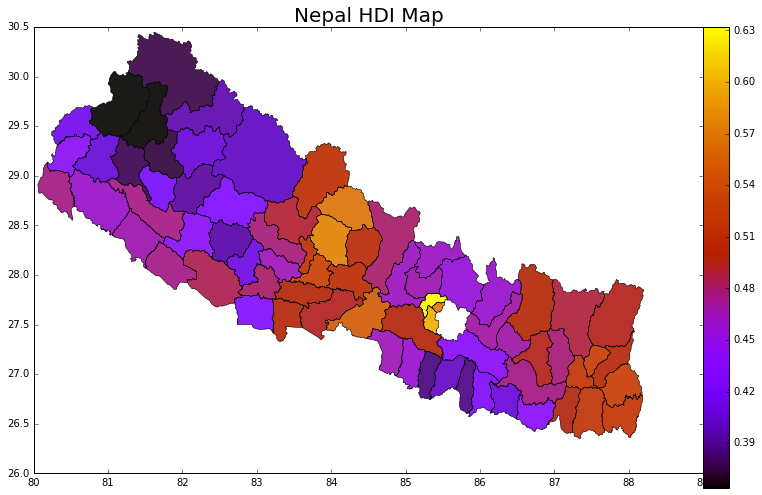

In [39]:
f, (ax1) = plt.subplots(figsize=(12,8))
geo_df.plot(column='HDI ',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title("Nepal HDI Map", fontsize=20)
geo_df.plot(alpha=0.01, linewidth=0.25, ax=ax1)

vmin, vmax = min(geo_df['HDI '].values), \
            max(geo_df['HDI '].values)

fig = ax1.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

In [40]:
geo_df2 = pd.merge(hdi_caste2, nepal, left_on='District ', right_on='DISTRICT')

In [41]:
geo_df2 = gpd.GeoDataFrame(geo_df2, geometry=geo_df['geometry'])
geo_df2.crs = {'init' :'epsg:4326'}
geo_df2.head(2)

,District,Zone,Geographical Region,Development Region,HDI,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,...,Mtn/Hill Janajati A,Mtn/Hill Janajati B,Musalman,Newar,Other (MPB),Other undefined,Tarai Janajati,DISTRICT,geometry,area
0,Achham,Seti,Hill,Far-Western,0.378,0.0,26272.0,149787.0,34800.0,26.0,...,1782.0,679.0,257.0,127.0,449.0,41773.0,258.0,Achham,"POLYGON ((81.17229242753619 29.38594791966788,...",0.157596
1,Arghakhanchi,Lumbini,Hill,Western,0.482,0.0,64757.0,38192.0,41309.0,317.0,...,38212.0,6863.0,1773.0,5528.0,0.0,225.0,234.0,Arghakhanchi,"POLYGON ((83.00438676076416 28.11207481910646,...",0.113578


In [42]:
geo_df2 = geo_df2.drop(['Zone', 'Geographical Region', 'Development Region', 'DISTRICT'],axis=1)

In [43]:
master = pd.read_csv('Data/master.csv')

In [44]:
master = master[['Total Population','Unnamed: 0']]
master = master.rename(columns={'Unnamed: 0':'District'})

In [45]:
print master.dtypes
print geo_df2.dtypes

Total Population    float64
District             object
dtype: object
District                     object
HDI                         float64
Foreigner                   float64
Hill Brahman                float64
Hill Chhetree               float64
Hill Dalit                  float64
Madhesi Brahman/Chhetree    float64
Madhesi Dalit               float64
Madhesi Other - OC A        float64
Madhesi Other - OC B        float64
Mtn/Hill Janajati A         float64
Mtn/Hill Janajati B         float64
Musalman                    float64
Newar                       float64
Other (MPB)                 float64
Other undefined             float64
Tarai Janajati              float64
geometry                     object
area                        float64
dtype: object


In [46]:
normed = pd.merge(geo_df2, master, left_on='District ', right_on='District')
normed = normed.drop('District ',axis=1)

In [47]:
normed.head()

,HDI,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,Mtn/Hill Janajati B,Musalman,Newar,Other (MPB),Other undefined,Tarai Janajati,geometry,area,Total Population,District
0,0.378,0.0,26272.0,149787.0,34800.0,26.0,0.0,1267.0,0.0,1782.0,679.0,257.0,127.0,449.0,41773.0,258.0,"POLYGON ((81.17229242753619 29.38594791966788,...",0.157596,272064.0,Achham
1,0.482,0.0,64757.0,38192.0,41309.0,317.0,13.0,209.0,0.0,38212.0,6863.0,1773.0,5528.0,0.0,225.0,234.0,"POLYGON ((83.00438676076416 28.11207481910646,...",0.113578,244257.0,Arghakhanchi
2,0.475,284.0,32657.0,95423.0,33385.0,7562.0,21416.0,61535.0,11062.0,32853.0,3166.0,93298.0,6344.0,2498.0,12182.0,77636.0,"POLYGON ((81.68570664532412 28.33800927472859,...",0.172655,484266.0,Banke
3,0.478,12.0,52483.0,55227.0,70707.0,313.0,0.0,249.0,0.0,82780.0,2569.0,742.0,2880.0,0.0,480.0,171.0,"POLYGON ((83.0995479013139 28.63461191368992, ...",0.168926,315702.0,Baglung
4,0.416,13.0,46541.0,151517.0,20863.0,404.0,32.0,13172.0,0.0,971.0,155.0,21.0,121.0,34.0,16804.0,250.0,"POLYGON ((80.75732036088453 29.70588803774486,...",0.138882,275839.0,Baitadi


In [48]:
normed.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]] = normed.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].div(normed['Total Population'], axis=0)

In [49]:
normed = normed[normed.columns[::-1]]

In [50]:
normed.head(2)

,District,Total Population,area,geometry,Tarai Janajati,Other undefined,Other (MPB),Newar,Musalman,Mtn/Hill Janajati B,Mtn/Hill Janajati A,Madhesi Other - OC B,Madhesi Other - OC A,Madhesi Dalit,Madhesi Brahman/Chhetree,Hill Dalit,Hill Chhetree,Hill Brahman,Foreigner,HDI
0,Achham,272064.0,0.157596,"POLYGON ((81.17229242753619 29.38594791966788,...",0.000948,0.153541,0.00165,0.000467,0.000945,0.002496,0.006550,0.0,0.004657,0.000000,0.000096,0.127911,0.550558,0.096566,0.0,0.378
1,Arghakhanchi,244257.0,0.113578,"POLYGON ((83.00438676076416 28.11207481910646,...",0.000958,0.000921,0.00000,0.022632,0.007259,0.028097,0.156442,0.0,0.000856,0.000053,0.001298,0.169121,0.156360,0.265118,0.0,0.482


In [51]:
normed = normed.dropna()

In [52]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import numpy as np

In [53]:
X = normed.iloc[:,4:]

In [54]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

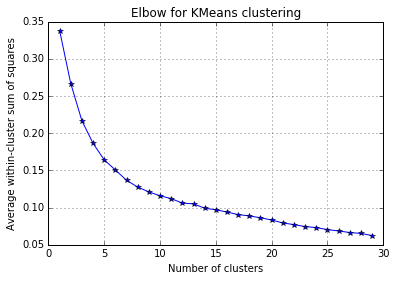

In [55]:
elbow(X, range(1,30))

In [56]:
n = 7
km = KMeans(n_clusters=n, random_state=324)
km.fit(X)
features_stand_KM = km.predict(X)
centers = km.cluster_centers_
labels = km.labels_

In [57]:
normed['labels'] = labels

In [58]:
type(normed)

geopandas.geodataframe.GeoDataFrame

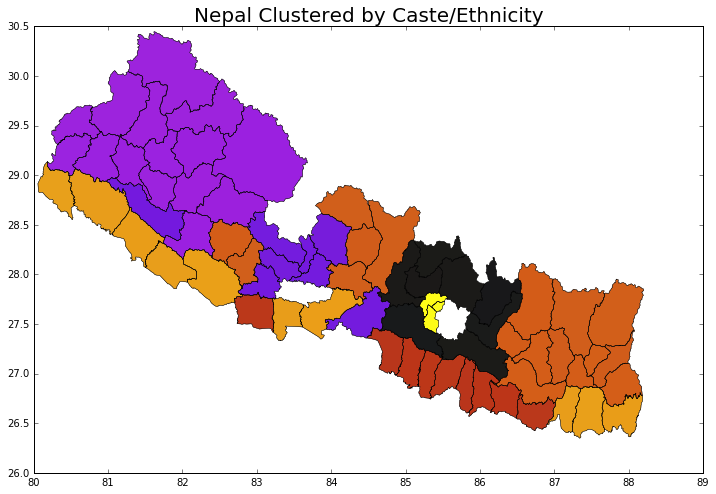

In [59]:
f, (ax1) = plt.subplots(figsize=(12,8))
normed.plot(column='labels',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title('Nepal Clustered by Caste/Ethnicity', fontsize=20)
normed.plot(alpha=0.01, linewidth=0.25, ax=ax1)

In [60]:
n = 5
km = KMeans(n_clusters=n, random_state=324)
km.fit(X)
features_stand_KM = km.predict(X)
centers = km.cluster_centers_
labels = km.labels_

In [61]:
normed['labels'] = labels

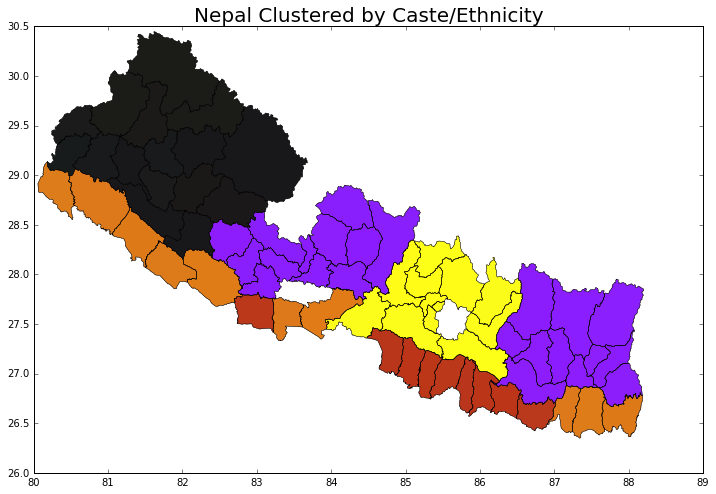

In [62]:
f, (ax1) = plt.subplots(figsize=(12,8))
normed.plot(column='labels',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title('Nepal Clustered by Caste/Ethnicity', fontsize=20)
normed.plot(alpha=0.01, linewidth=0.25, ax=ax1)

In [63]:
normed.head(2)

,District,Total Population,area,geometry,Tarai Janajati,Other undefined,Other (MPB),Newar,Musalman,Mtn/Hill Janajati B,...,Madhesi Other - OC B,Madhesi Other - OC A,Madhesi Dalit,Madhesi Brahman/Chhetree,Hill Dalit,Hill Chhetree,Hill Brahman,Foreigner,HDI,labels
0,Achham,272064.0,0.157596,"POLYGON ((81.17229242753619 29.38594791966788,...",0.000948,0.153541,0.00165,0.000467,0.000945,0.002496,...,0.0,0.004657,0.000000,0.000096,0.127911,0.550558,0.096566,0.0,0.378,0
1,Arghakhanchi,244257.0,0.113578,"POLYGON ((83.00438676076416 28.11207481910646,...",0.000958,0.000921,0.00000,0.022632,0.007259,0.028097,...,0.0,0.000856,0.000053,0.001298,0.169121,0.156360,0.265118,0.0,0.482,1


In [64]:
for_export = normed.iloc[:,[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]

In [65]:
print len(for_export)

70


In [66]:
for_export.to_csv('Data/normalized_ce.csv')

In [67]:
caste = pd.read_csv('Data/caste_percent.csv')

In [68]:
caste.head(2)

,Unnamed: 0,Aathpariya,Amat,Badhaee,Badi,Bahing,Bangali,Bantaba,Bantar/Sardar,Baraee,...,Thami,Tharu,Thulung,Topkegola,Undefined Others,Walung,Yadav,Yakkha,Yamphu,Tot_Pop
0,Achham,0.0,0.0,0.0,0.304105,0.0,0.174385,0.0,0.0,0.0,...,0.0,0.095543,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,257477
1,Arghakhanchi,0.0,0.0,0.0,0.141677,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.118402,0.0,0.0,0.0,0.0,0.00759,0.0,0.0,197632


In [69]:
caste = caste.drop('Tot_Pop',axis=1)

In [70]:
X = caste.iloc[:,1:]

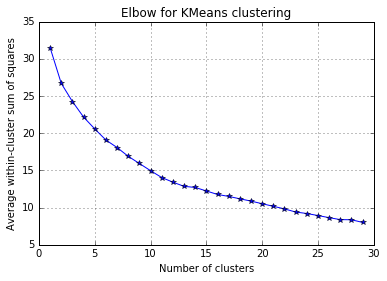

In [71]:
elbow(X, range(1,30))

In [72]:
n = 5
km = KMeans(n_clusters=n, random_state=324)
km.fit(X)
features_stand_KM = km.predict(X)
centers = km.cluster_centers_
labels = km.labels_

In [73]:
caste['labels'] = labels

In [74]:
caste = pd.merge(caste, nepal, left_on='Unnamed: 0', right_on='DISTRICT')

In [75]:
caste = gpd.GeoDataFrame(caste, geometry=caste['geometry'])
caste.crs = {'init' :'epsg:4326'}
caste.head(2)

,Unnamed: 0,Aathpariya,Amat,Badhaee,Badi,Bahing,Bangali,Bantaba,Bantar/Sardar,Baraee,...,Topkegola,Undefined Others,Walung,Yadav,Yakkha,Yamphu,labels,DISTRICT,geometry,area
0,Achham,0.0,0.0,0.0,0.304105,0.0,0.174385,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,1,Achham,"POLYGON ((81.17229242753619 29.38594791966788,...",0.157596
1,Arghakhanchi,0.0,0.0,0.0,0.141677,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00759,0.0,0.0,4,Arghakhanchi,"POLYGON ((83.00438676076416 28.11207481910646,...",0.113578


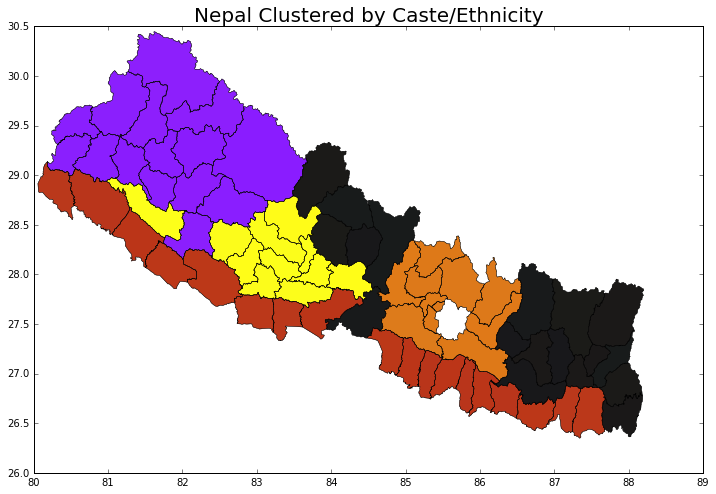

In [76]:
f, (ax1) = plt.subplots(figsize=(12,8))
caste.plot(column='labels',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title('Nepal Clustered by Caste/Ethnicity', fontsize=20)
caste.plot(alpha=0.01, linewidth=0.25, ax=ax1)